# import library

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ดึงข้อมูล

In [136]:
stock_symbol = "SCC.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-12-31")
df2

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SCC.BK,SCC.BK,SCC.BK,SCC.BK,SCC.BK
Date,,,,,
2015-01-05,320.738892,323.589904,317.887879,323.589904,1020300
2015-01-06,315.036865,317.887878,309.334841,317.887878,2115900
2015-01-07,315.036865,315.036865,310.760347,312.185853,2041500
2015-01-08,319.313385,322.164397,316.462373,317.887879,1209700
2015-01-09,323.589844,323.589844,320.738832,322.164338,545500
...,...,...,...,...,...
2023-12-22,288.308380,288.308380,284.412321,286.360351,1358500
2023-12-25,288.308380,289.282395,286.360351,287.334365,561700


# ลบข้อมูลที่มีค่าว่าง

In [78]:
df2 = df2.drop(df2.index[[0, 1]])
df2.head()

Price,Close,High,Low,Open,Volume
Ticker,SCC.BK,SCC.BK,SCC.BK,SCC.BK,SCC.BK
Date,,,,,
2015-01-07,315.036896,315.036896,310.760377,312.185883,2041500
2015-01-08,319.313477,322.164490,316.462463,317.887970,1209700
2015-01-09,323.589905,323.589905,320.738892,322.164399,545500
2015-01-12,323.589905,326.440917,319.313386,319.313386,904500
2015-01-13,326.440948,327.866455,319.313417,320.738923,1021500


# ตรวจสอบค่าที่หายไปใน DataFrame

In [80]:
print("Missing Values:\n", df2.isnull().sum())

Missing Values:
 Price   Ticker
Close   SCC.BK    0
High    SCC.BK    0
Low     SCC.BK    0
Open    SCC.BK    0
Volume  SCC.BK    0
dtype: int64


In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1990 entries, 2015-01-07 to 2023-03-10
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, SCC.BK)   1990 non-null   float64
 1   (High, SCC.BK)    1990 non-null   float64
 2   (Low, SCC.BK)     1990 non-null   float64
 3   (Open, SCC.BK)    1990 non-null   float64
 4   (Volume, SCC.BK)  1990 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.3 KB


In [84]:
df2.describe()

Price,Close,High,Low,Open,Volume
Ticker,SCC.BK,SCC.BK,SCC.BK,SCC.BK,SCC.BK
count,1990.000000,1990.000000,1990.000000,1990.000000,1.990000e+03
mean,356.022600,358.959869,353.339370,356.224009,2.554797e+06
std,32.179773,31.981044,32.344093,32.308069,1.853292e+06
min,227.058563,236.413048,207.499261,221.105770,0.000000e+00
25%,333.359406,336.350819,330.693247,333.181785,1.466200e+06
50%,358.787476,360.849376,355.404951,358.391571,2.131600e+06
75%,382.121056,385.409342,379.601927,382.822768,3.113175e+06
max,427.154785,427.359718,421.166073,425.811260,4.198940e+07


# พล็อตกราฟ แสดงราคาปิดหุ้น SCC

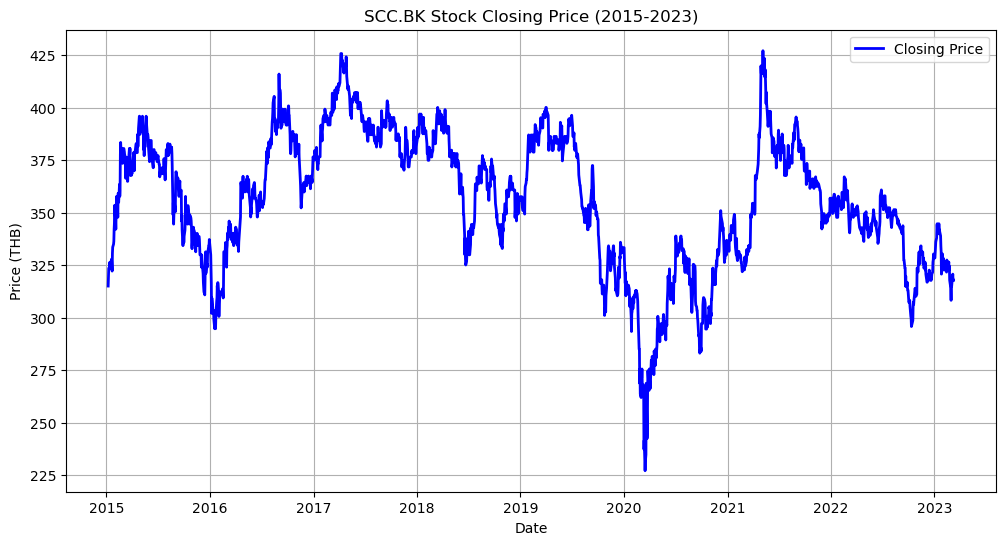

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Close'], label="Closing Price", linewidth=2, color='blue')

# เพิ่ม title และ labels
plt.title("SCC.BK Stock Closing Price (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error


# การฝึกโมเดล และพยากรณ์หุ้น

[*********************100%***********************]  1 of 1 completed
C:\Users\Zbook Firefly 14 G8\anaconda3\envs\shifa\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Zbook Firefly 14 G8\anaconda3\envs\shifa\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


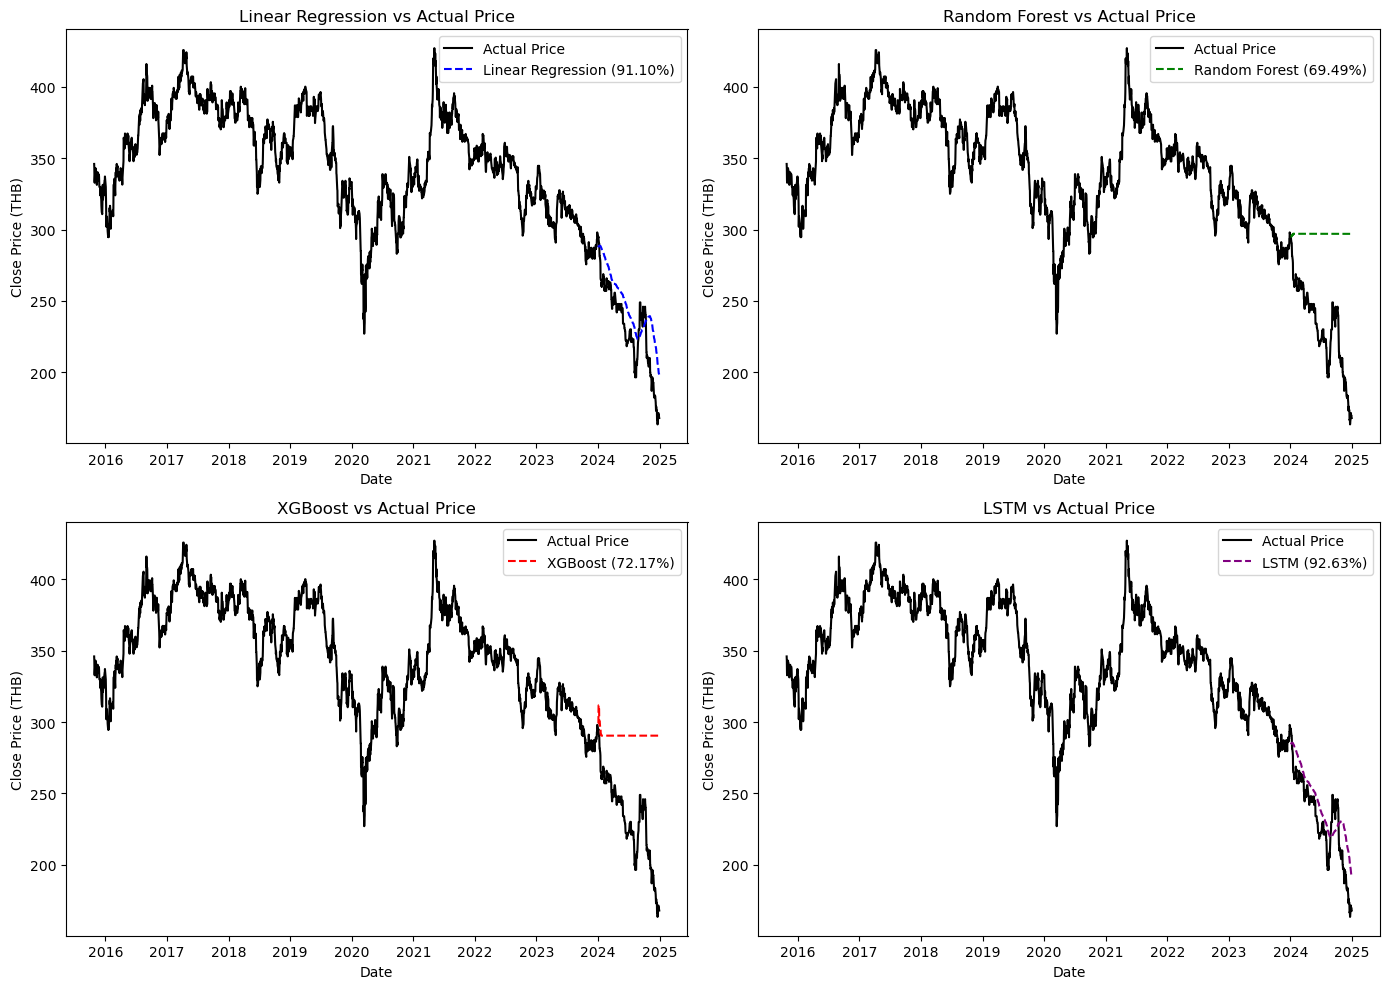

In [96]:
# โหลดข้อมูลหุ้น SCC.BK (ถึงปี 2024)
ticker = "SCC.BK"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']  # ใช้ข้อมูลถึงปี 2023 เป็น Train Data
test = data.loc['2024']  # ใช้ปี 2024 เป็น Test Data โดยใช้ .loc เพื่อเลือกปี 2024

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยกสำหรับแต่ละโมเดลเทียบกับข้อมูลจริง ----------
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.title("Linear Regression vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.title("Random Forest vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# XGBoost
plt.subplot(2, 2, 3)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.title("XGBoost vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
plt.title("LSTM vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

plt.tight_layout()
plt.show()


In [98]:
print("\n📊 Confidence Score (% ความแม่นยำจากปี 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")



📊 Confidence Score (% ความแม่นยำจากปี 2024):
Linear Regression: 91.10%
Random Forest: 69.49%
XGBoost: 72.17%
LSTM: 92.63%
